## This notebook aims to visualize the different asset distributions produced by CGAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.insert(0, parent_dir)

from utilities.gan_plotting import extensive_plotting
from utilities.backtesting_plots import backtest_var_single_asset
from utilities.gan_plotting import load_generated_returns
from backtesting.perform_var_tests import perform_var_backtesting_tests
from backtesting.perform_distribution_tests import perform_distribution_tests
from utilities.gan_plotting import create_rolling_empirical


In [2]:
import os
print(os.getcwd())

c:\Users\nicka\master-thesis\internal_models\CGANs


## Note to self -- We only test assets MSCIWORLD, HY and EONIA

In [3]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)

    selected_columns = df.iloc[:, [0,1,2,4]]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:252]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [4]:
asset_names = returns_df.columns

## TRAINING CGAN

In [10]:
from CGAN1 import CGAN1

for asset_name in returns_df.columns:
    print(f"Training CGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = CGAN1(asset_returns, asset_name)
    
    # Train WGAN for this asset
    gan.train()
    gan.generate_scenarios(num_scenarios=20000)
    
    print(f"Finished training CGAN for {asset_name}.\n")

Training CGAN for REEL...
[Epoch 0/2000] [Batch 0/16] [D loss: 0.0613] [G loss: 0.0383]
[Epoch 0/2000] [Batch 10/16] [D loss: 0.1015] [G loss: -0.0136]
[Epoch 1/2000] [Batch 0/16] [D loss: -0.1090] [G loss: 0.0179]
[Epoch 1/2000] [Batch 10/16] [D loss: -0.0115] [G loss: -0.0099]
[Epoch 2/2000] [Batch 0/16] [D loss: -0.1365] [G loss: 0.0897]
[Epoch 2/2000] [Batch 10/16] [D loss: -0.0489] [G loss: 0.1655]
[Epoch 3/2000] [Batch 0/16] [D loss: -0.1895] [G loss: 0.1095]
[Epoch 3/2000] [Batch 10/16] [D loss: 0.0965] [G loss: 0.1073]
[Epoch 4/2000] [Batch 0/16] [D loss: 0.0363] [G loss: 0.0726]
[Epoch 4/2000] [Batch 10/16] [D loss: 0.0379] [G loss: 0.2229]
[Epoch 5/2000] [Batch 0/16] [D loss: -0.2641] [G loss: 0.3292]
[Epoch 5/2000] [Batch 10/16] [D loss: -0.1742] [G loss: 0.1907]
[Epoch 6/2000] [Batch 0/16] [D loss: -0.1549] [G loss: 0.3368]
[Epoch 6/2000] [Batch 10/16] [D loss: -0.2770] [G loss: 0.3611]
[Epoch 7/2000] [Batch 0/16] [D loss: 0.1606] [G loss: 0.2989]
[Epoch 7/2000] [Batch 10/1

## RESULTS

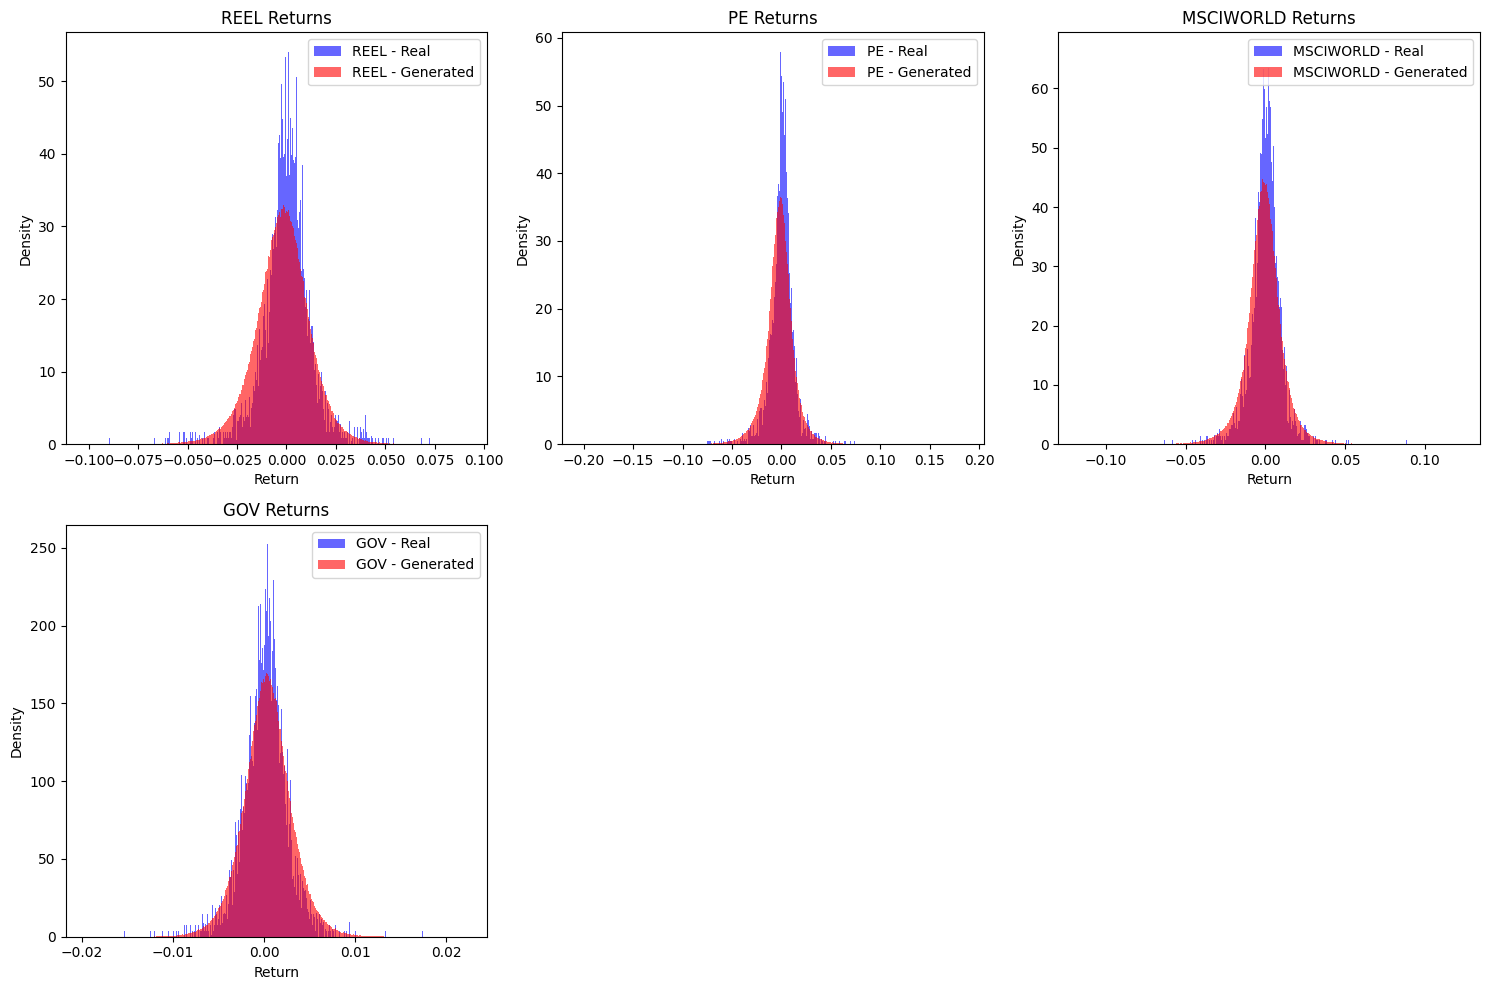


üìä Return Statistics Summary:
                Asset      Mean  Std Dev  Skewness  Kurtosis  99.5% VaR
          REEL - Real  0.000193 0.012916 -0.270455  4.969021  -0.051644
     REEL - Generated -0.001982 0.014131 -0.145357  1.393210  -0.045482
            PE - Real  0.000224 0.012736 -0.303648  6.380382  -0.052287
       PE - Generated -0.001984 0.014949 -0.349899  4.566936  -0.054574
     MSCIWORLD - Real  0.000283 0.009887 -0.226726  7.359869  -0.037021
MSCIWORLD - Generated -0.000766 0.011890 -0.110660  3.703975  -0.040993
           GOV - Real  0.000183 0.002449 -0.034370  4.018610  -0.008100
      GOV - Generated  0.000368 0.002724  0.043272  1.121259  -0.007439



‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  ANALYZING ASSET: REEL  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

Variance of Real Data: 0.000167
Variance of Generated Data: 0.000149
‚úÖ Generated Data Shows Reasonable Variance
Mean 

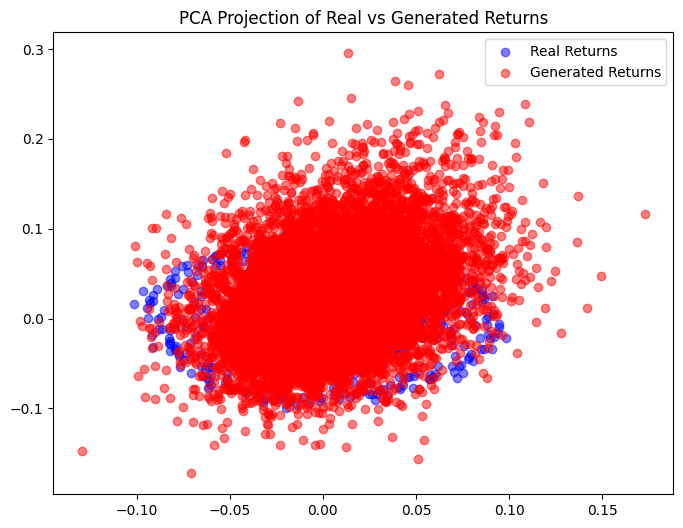

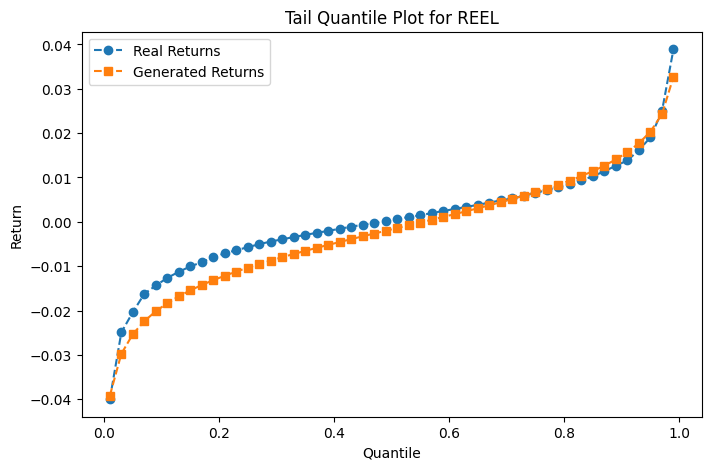


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING NEAREST DISTANCE HISTOGRAM: REEL  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


üìä Distance Summary for REEL:
Min Distance: 0.000000
Max Distance: 2.564920
Mean Distance: 0.001395
Median Distance: 0.000352
Standard Deviation: 0.008735


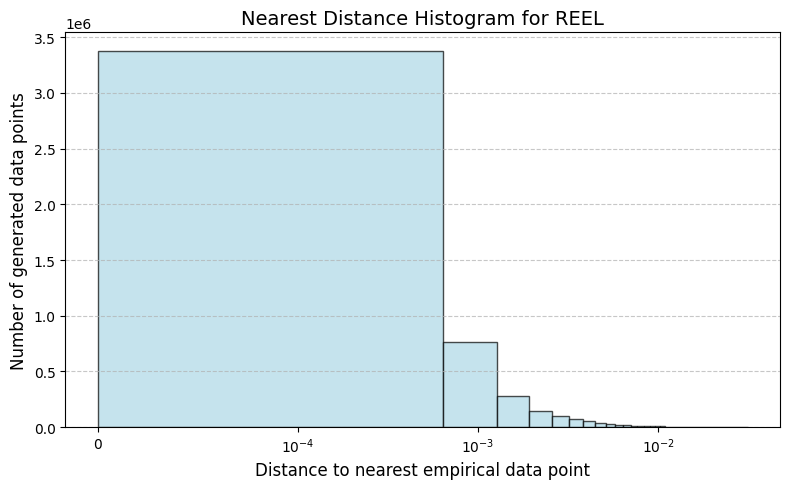


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING WASSERSTEIN DISTANCE: REEL  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

üìä Wasserstein Distance for REEL: 0.002703


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  ANALYZING ASSET: PE  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

Variance of Real Data: 0.000162
Variance of Generated Data: 0.000175
‚úÖ Generated Data Shows Reasonable Variance
Mean Pairwise Distance (Real): 0.268750
Mean Pairwise Distance (Generated): 0.276124
‚úÖ Generated samples are reasonably diverse


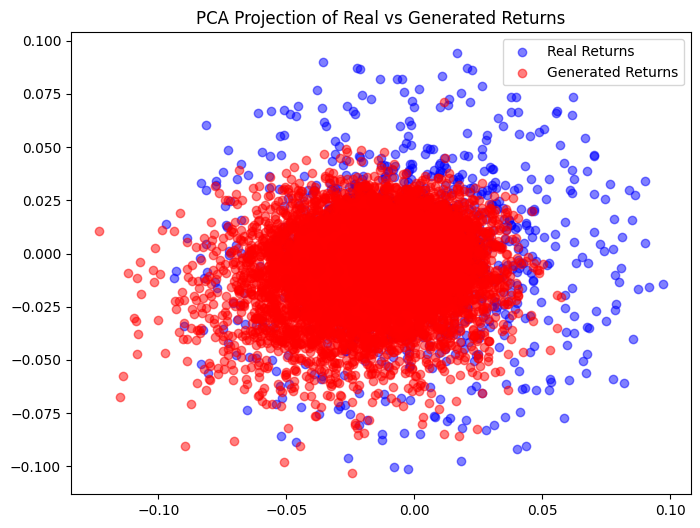

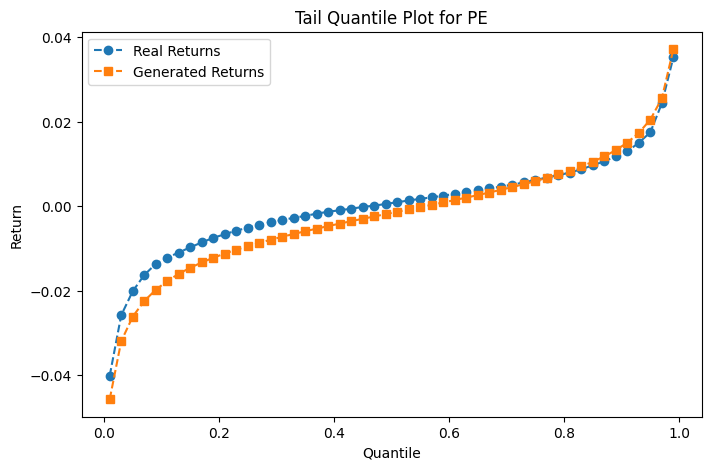


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING NEAREST DISTANCE HISTOGRAM: PE  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


üìä Distance Summary for PE:
Min Distance: 0.000000
Max Distance: 7.956658
Mean Distance: 0.002160
Median Distance: 0.000319
Standard Deviation: 0.037774


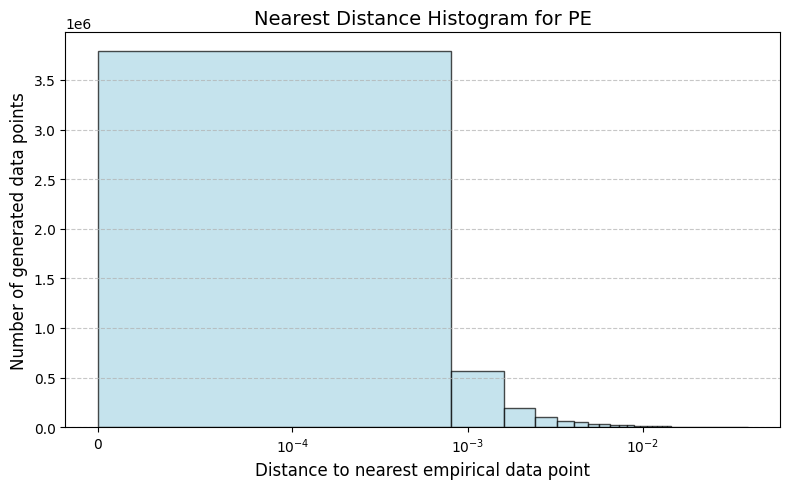


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING WASSERSTEIN DISTANCE: PE  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

üìä Wasserstein Distance for PE: 0.002850


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  ANALYZING ASSET: MSCIWORLD  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

Variance of Real Data: 0.000098
Variance of Generated Data: 0.000111
‚úÖ Generated Data Shows Reasonable Variance
Mean Pairwise Distance (Real): 0.211255
Mean Pairwise Distance (Generated): 0.221864
‚úÖ Generated samples are reasonably diverse


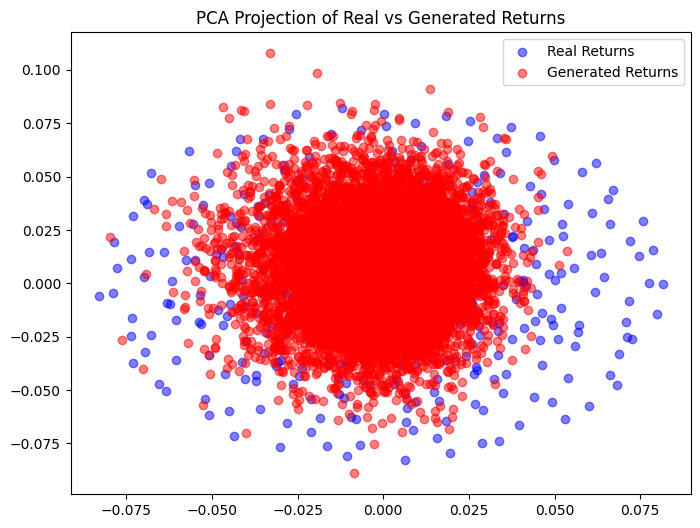

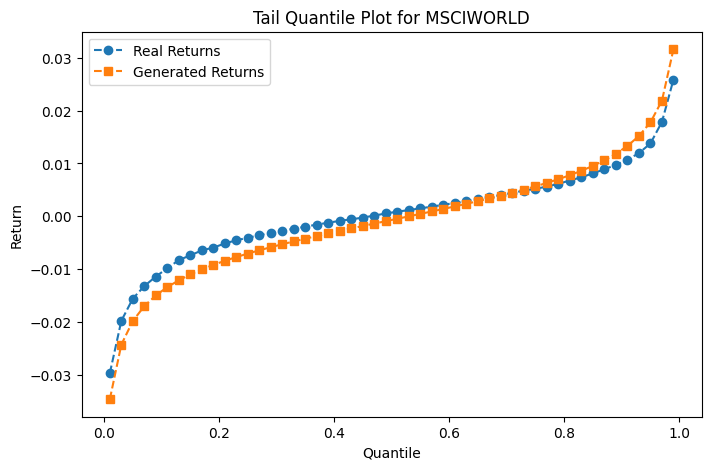


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING NEAREST DISTANCE HISTOGRAM: MSCIWORLD  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


üìä Distance Summary for MSCIWORLD:
Min Distance: 0.000000
Max Distance: 3.544199
Mean Distance: 0.001820
Median Distance: 0.000325
Standard Deviation: 0.014824


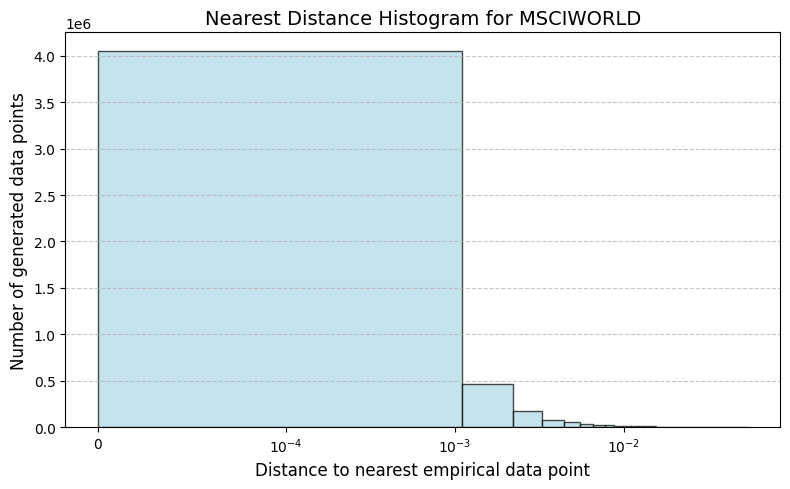


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING WASSERSTEIN DISTANCE: MSCIWORLD  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

üìä Wasserstein Distance for MSCIWORLD: 0.002122


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  ANALYZING ASSET: GOV  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

Variance of Real Data: 0.000006
Variance of Generated Data: 0.000005
‚úÖ Generated Data Shows Reasonable Variance
Mean Pairwise Distance (Real): 0.054322
Mean Pairwise Distance (Generated): 0.050103
‚úÖ Generated samples are reasonably diverse


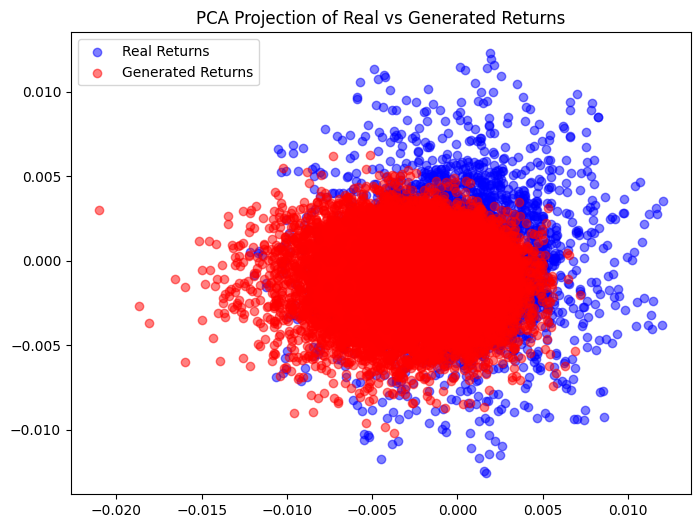

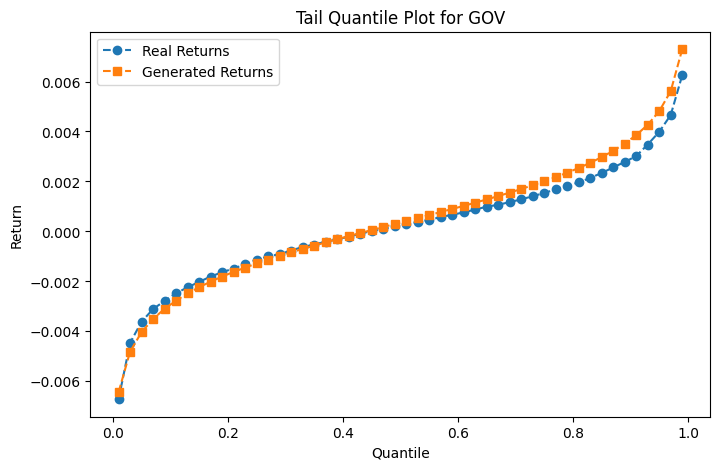


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING NEAREST DISTANCE HISTOGRAM: GOV  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


üìä Distance Summary for GOV:
Min Distance: 0.000000
Max Distance: 1.589298
Mean Distance: 0.001336
Median Distance: 0.000354
Standard Deviation: 0.007642


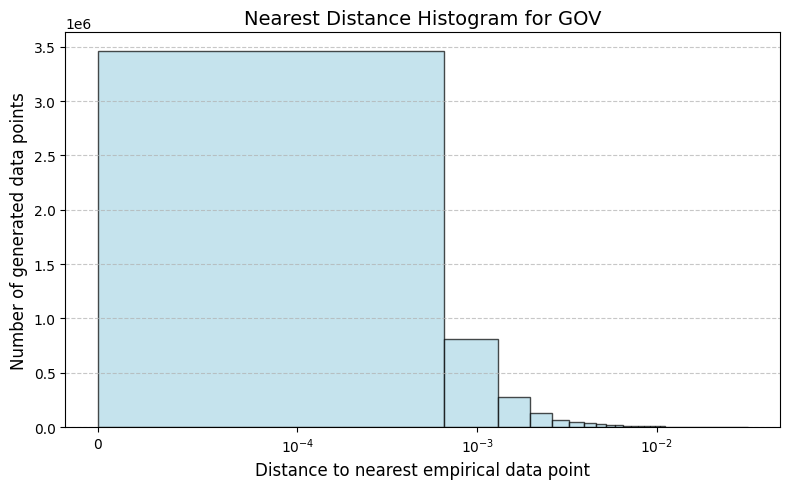


‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
‚ïë  COMPUTING WASSERSTEIN DISTANCE: GOV  ‚ïë
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

üìä Wasserstein Distance for GOV: 0.000336



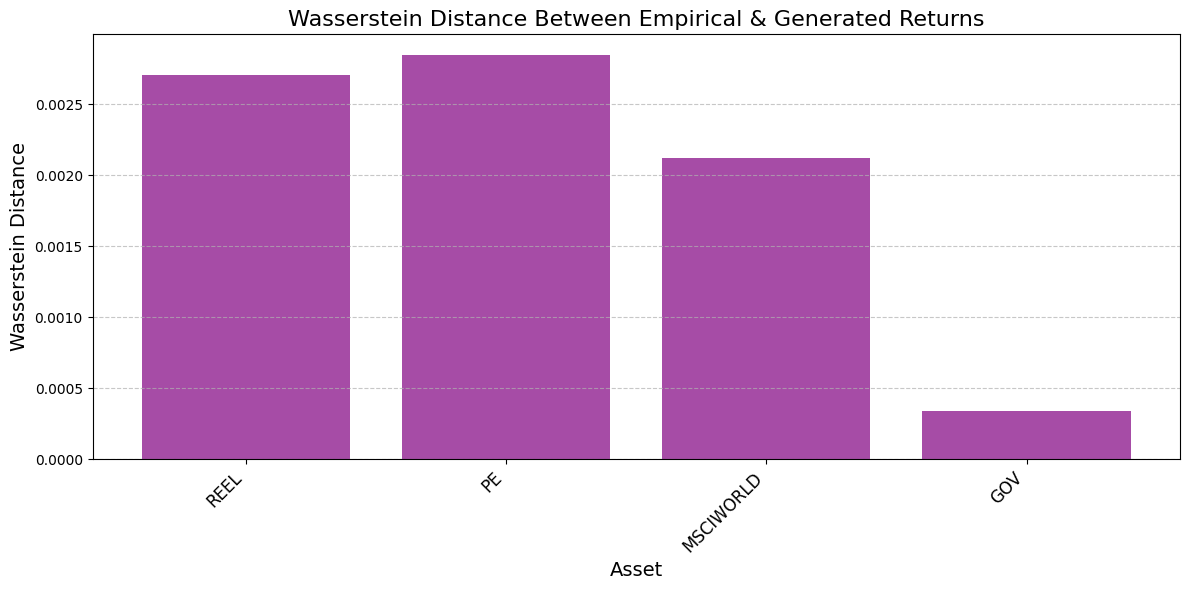

In [5]:
extensive_plotting(scaled=False, returns_df=returns_df, test=True)

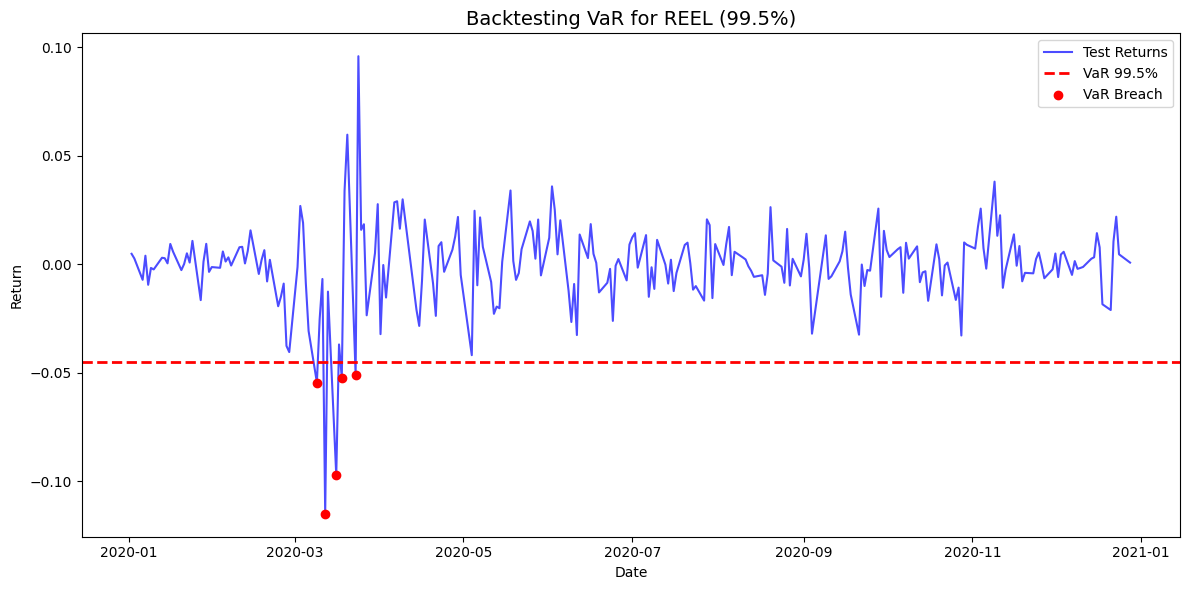


üìä VaR Backtesting Summary for REEL:
VaR 99.5% threshold: -0.045167
Failures (breaches below VaR): 5 times

üìä VaR Backtesting Results for REEL

üîç Kupiec Proportion of Failures (POF) Test
üìù Likelihood Ratio (LR_pof): 6.3593
üìä p-value: 0.011677
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR model may be misspecified ‚ö†Ô∏è

üîç Christoffersen Independence Test
üìù Likelihood Ratio (LR_ind): 49.0196
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR breaches are clustered ‚ö†Ô∏è

üîç Joint (Conditional Coverage) Test
üìù Joint Likelihood Ratio (LR_joint): 55.3789
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - Joint test indicates model misspecification ‚ö†Ô∏è

üîç Lopez Average Loss
üìù Average Lopez Loss: 0.034890
üö¶ Lower values indicate fewer or less severe violations.

üîç Balanced SCR Loss
üìù Loss: 0.034890
üö¶ A higher value is worse.

Distribution Tests for REEL
Overall Moments Comparison:
Generated -> Mean: -0.

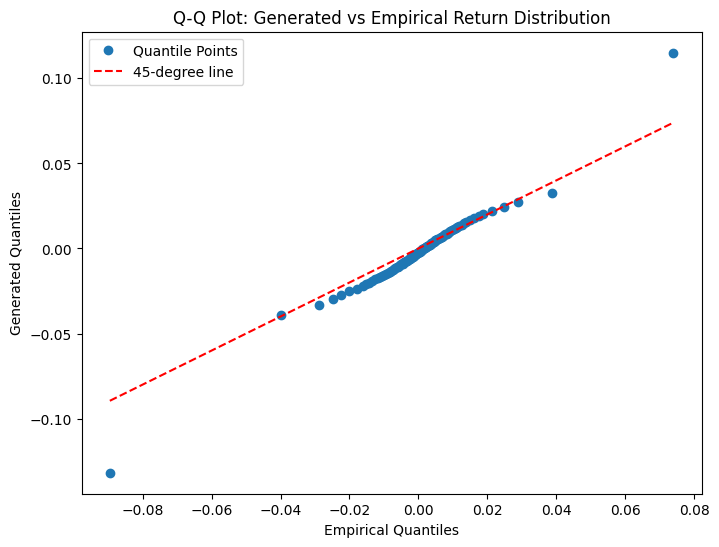


Assessing Fat Tails via Rolling Windows (Excess Kurtosis Comparison)...
Overall Mean Generated Excess Kurtosis: 1.3986616
Overall Mean Empirical Excess Kurtosis: 4.969059015521381
Difference (Generated - Empirical): -3.5703974020570257
Interpretation: The generated distribution exhibits significantly lighter tails than the empirical data.


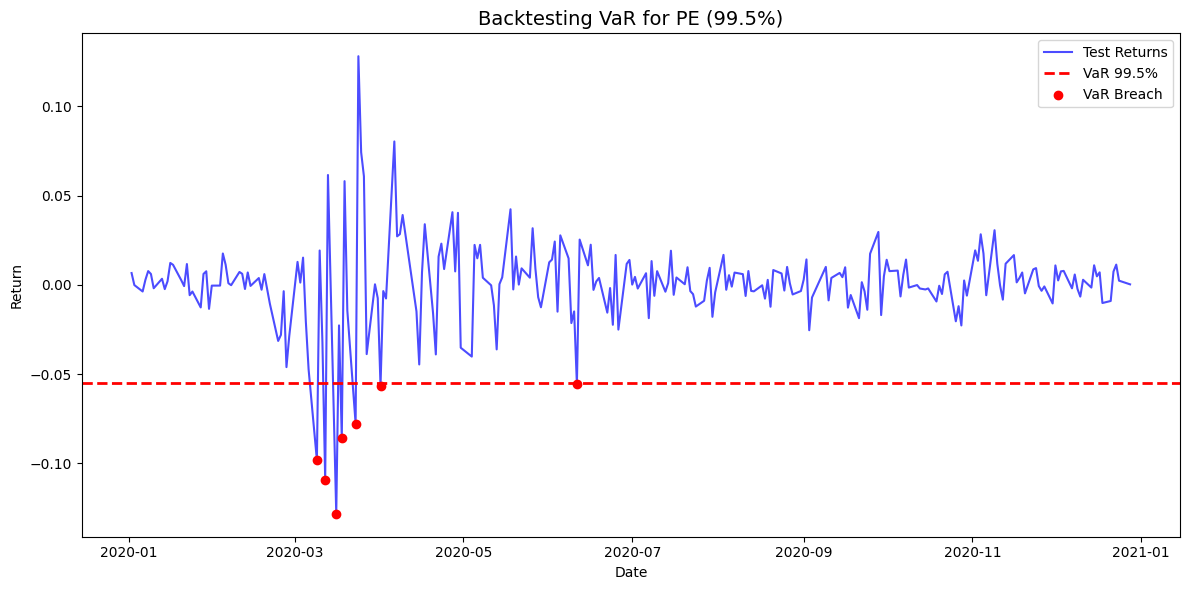


üìä VaR Backtesting Summary for PE:
VaR 99.5% threshold: -0.055095
Failures (breaches below VaR): 7 times

üìä VaR Backtesting Results for PE

üîç Kupiec Proportion of Failures (POF) Test
üìù Likelihood Ratio (LR_pof): 12.6596
üìä p-value: 0.000374
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR model may be misspecified ‚ö†Ô∏è

üîç Christoffersen Independence Test
üìù Likelihood Ratio (LR_ind): 63.8599
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR breaches are clustered ‚ö†Ô∏è

üîç Joint (Conditional Coverage) Test
üìù Joint Likelihood Ratio (LR_joint): 76.5194
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - Joint test indicates model misspecification ‚ö†Ô∏è

üîç Lopez Average Loss
üìù Average Lopez Loss: 0.042957
üö¶ Lower values indicate fewer or less severe violations.

üîç Balanced SCR Loss
üìù Loss: 0.042957
üö¶ A higher value is worse.

Distribution Tests for PE
Overall Moments Comparison:
Generated -> Mean: -0.0020,

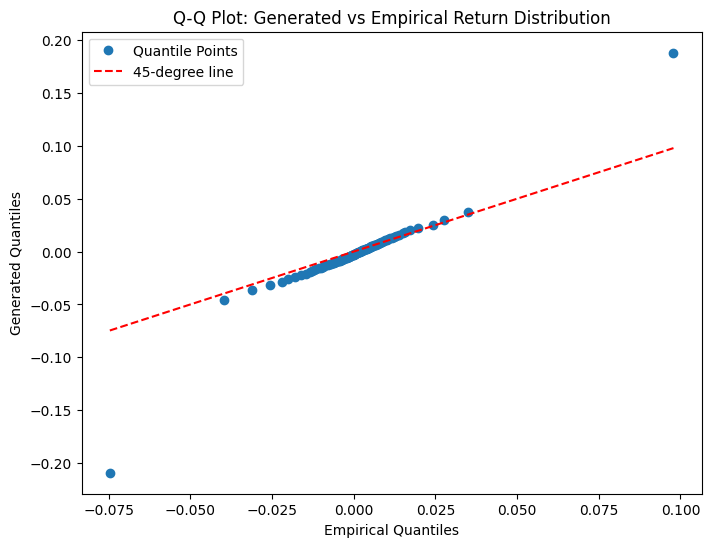


Assessing Fat Tails via Rolling Windows (Excess Kurtosis Comparison)...
Overall Mean Generated Excess Kurtosis: 4.560232
Overall Mean Empirical Excess Kurtosis: 6.380429483234719
Difference (Generated - Empirical): -1.8201973207591333
Interpretation: The generated distribution exhibits significantly lighter tails than the empirical data.


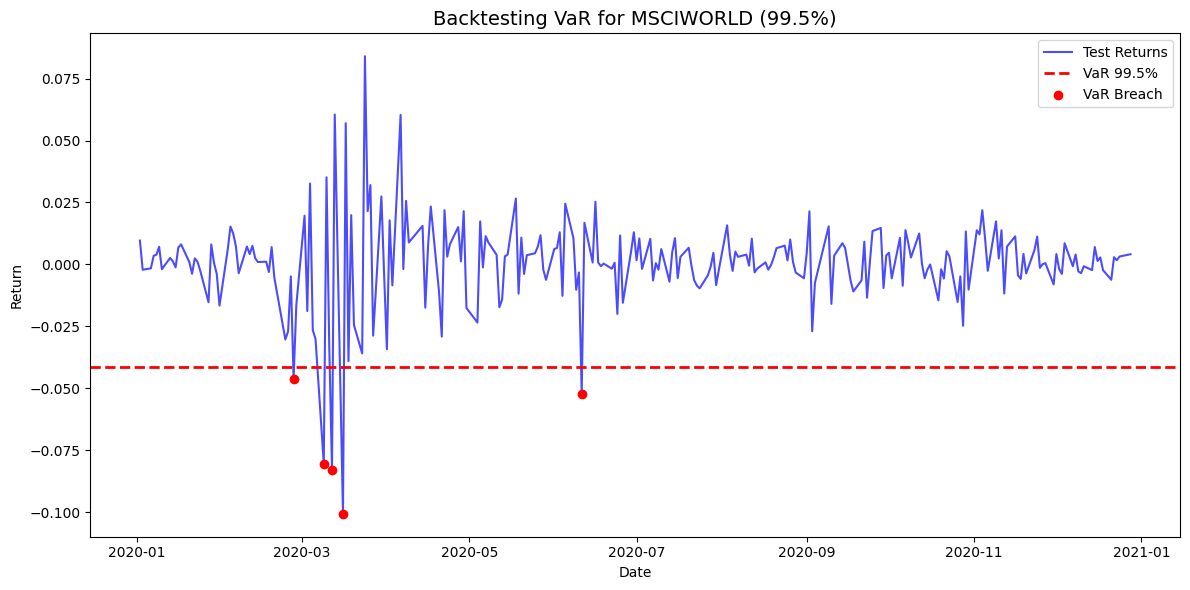


üìä VaR Backtesting Summary for MSCIWORLD:
VaR 99.5% threshold: -0.041531
Failures (breaches below VaR): 5 times

üìä VaR Backtesting Results for MSCIWORLD

üîç Kupiec Proportion of Failures (POF) Test
üìù Likelihood Ratio (LR_pof): 6.3593
üìä p-value: 0.011677
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR model may be misspecified ‚ö†Ô∏è

üîç Christoffersen Independence Test
üìù Likelihood Ratio (LR_ind): 49.0196
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR breaches are clustered ‚ö†Ô∏è

üîç Joint (Conditional Coverage) Test
üìù Joint Likelihood Ratio (LR_joint): 55.3789
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - Joint test indicates model misspecification ‚ö†Ô∏è

üîç Lopez Average Loss
üìù Average Lopez Loss: 0.035648
üö¶ Lower values indicate fewer or less severe violations.

üîç Balanced SCR Loss
üìù Loss: 0.035648
üö¶ A higher value is worse.

Distribution Tests for MSCIWORLD
Overall Moments Comparison:
Generat

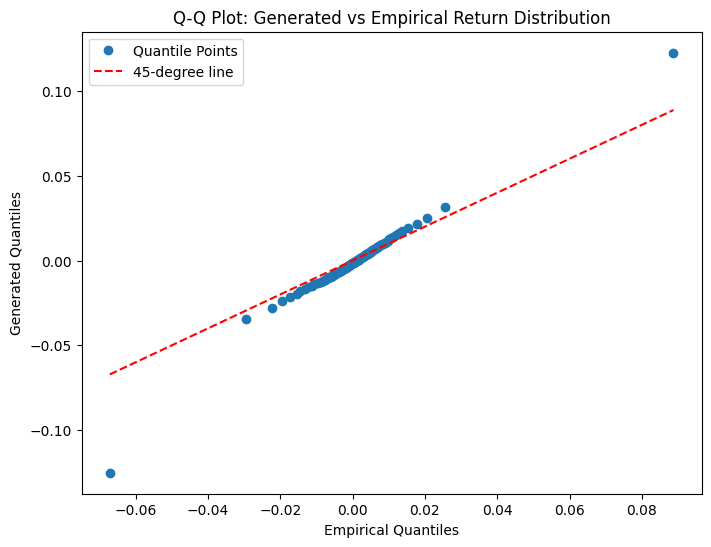


Assessing Fat Tails via Rolling Windows (Excess Kurtosis Comparison)...
Overall Mean Generated Excess Kurtosis: 3.6403913
Overall Mean Empirical Excess Kurtosis: 7.35992278471412
Difference (Generated - Empirical): -3.71953143492164
Interpretation: The generated distribution exhibits significantly lighter tails than the empirical data.


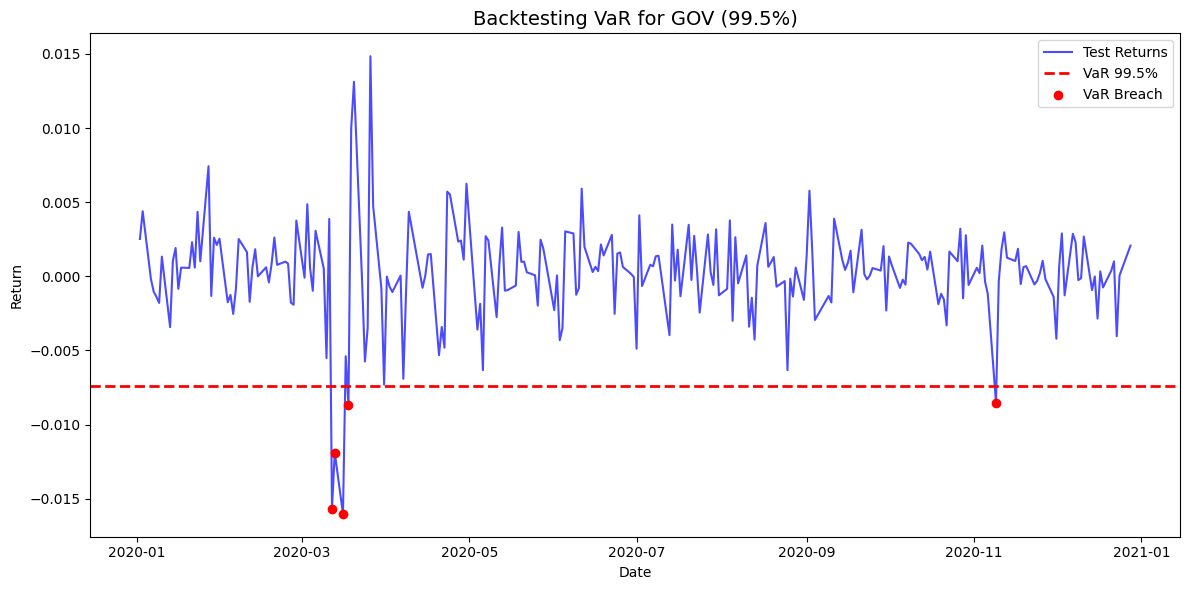


üìä VaR Backtesting Summary for GOV:
VaR 99.5% threshold: -0.007430
Failures (breaches below VaR): 5 times

üìä VaR Backtesting Results for GOV

üîç Kupiec Proportion of Failures (POF) Test
üìù Likelihood Ratio (LR_pof): 6.3593
üìä p-value: 0.011677
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR model may be misspecified ‚ö†Ô∏è

üîç Christoffersen Independence Test
üìù Likelihood Ratio (LR_ind): 49.0196
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - VaR breaches are clustered ‚ö†Ô∏è

üîç Joint (Conditional Coverage) Test
üìù Joint Likelihood Ratio (LR_joint): 55.3789
üìä p-value: 0.000000
üö¶ Test Conclusion: ‚ùå Failed (p < 0.1) - Joint test indicates model misspecification ‚ö†Ô∏è

üîç Lopez Average Loss
üìù Average Lopez Loss: 0.031665
üö¶ Lower values indicate fewer or less severe violations.

üîç Balanced SCR Loss
üìù Loss: 0.031665
üö¶ A higher value is worse.

Distribution Tests for GOV
Overall Moments Comparison:
Generated -> Mean: 0.0004

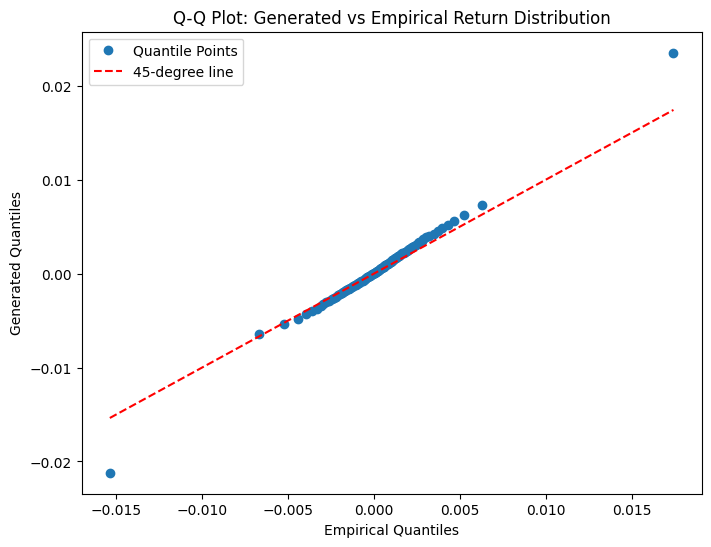


Assessing Fat Tails via Rolling Windows (Excess Kurtosis Comparison)...
Overall Mean Generated Excess Kurtosis: 1.1464634
Overall Mean Empirical Excess Kurtosis: 4.018642134505793
Difference (Generated - Empirical): -2.872178740340754
Interpretation: The generated distribution exhibits significantly lighter tails than the empirical data.


In [7]:
for asset_name in returns_df.columns:
    generated_returns = load_generated_returns(asset_name, test=True)
    failures = backtest_var_single_asset(test_returns_df[asset_name], generated_returns, asset_name)
    perform_var_backtesting_tests(failures=failures, returns=test_returns_df[asset_name], var_forecast=None, asset_name=asset_name, generated_returns=generated_returns)
    perform_distribution_tests(generated_returns=generated_returns, empirical_returns_rolling=create_rolling_empirical(returns_df[asset_name]), asset_name = asset_name)
